# Experiment on Data with some various plots

In [9]:
# Import Plotting libraries

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

#SciKit Learn
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
from sklearn.decomposition import PCA

#Plotly
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import scipy as sci
import statsmodels as stats

## Get the Tidy Data

In [10]:
import pandas as pd
import numpy as np

WorldData = pd.read_csv("WorldMarketData.csv", na_values = '..')
df_original = pd.DataFrame(WorldData)
pd.options.display.float_format = '{:,.2f}'.format
df_original.columns = ['country', 'country_code', 'series', 'series_code', '1994', '1995', '1996', '1997', '1998', 
             '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016', '2017', '2018']

df = df_original.drop(columns=['country_code', 'series_code'])
df = df.drop(df.index[3800:])
df1 = pd.melt(df,
                       ["country", 'series'],
                       var_name="year",
                       value_name="value")
#df1 = df1.sort_values(by=["year"], ascending = True)
df1 = df1.set_index('country').drop(index = ['World', 'Low income', 'Middle income', 'High income'])
df1 = df1.reset_index()
df1.head()

,country,series,year,value
0,United States,Agricultural raw materials exports (% of merch...,1994,3.49
1,United States,Agricultural raw materials imports (% of merch...,1994,2.04
2,United States,Average time to clear exports through customs ...,1994,nan
3,United States,Bribery incidence (% of firms experiencing at ...,1994,nan
4,United States,Changes in inventories (current US$),1994,"63,785,000,000.00"


# Making a 3D Scatter Plot comparing Two series over time using plotly

In [11]:
# Use a stacked index (could use a .groupby but we do that later on)
# Index now references both country and series

df_stack = df1.set_index(['series', 'country'])
df_stack

,,year,value
series,country,,
Agricultural raw materials exports (% of merchandise exports),United States,1994,3.49
Agricultural raw materials imports (% of merchandise imports),United States,1994,2.04
Average time to clear exports through customs (days),United States,1994,nan
Bribery incidence (% of firms experiencing at least one bribe payment request),United States,1994,nan
Changes in inventories (current US$),United States,1994,"63,785,000,000.00"
Commercial service exports (current US$),United States,1994,"183,327,000,000.00"
Commercial service imports (current US$),United States,1994,"120,768,000,000.00"
"Computer, communications and other services (% of commercial service exports)",United States,1994,36.14
"Computer, communications and other services (% of commercial service imports)",United States,1994,24.38


In [47]:
# Show only the GDP and GNI per country

df_stack_gdpgni = df_stack.loc[['GDP (current US$)', 'GNI (current US$)']]
df_stack_gdpgni.head(5)

,,year,value
series,country,,
GDP (current US$),United States,1994,"7,287,236,000,000.00"
GNI (current US$),United States,1994,"7,170,251,000,000.00"
GDP (current US$),United Kingdom,1994,"1,140,489,745,944.29"
GNI (current US$),United Kingdom,1994,"1,187,413,256,045.30"
GDP (current US$),China,1994,"564,324,670,005.92"


In [48]:
df_stack_gdpgni.reset_index()
df_stack_gdpgni.head()

,,year,value
series,country,,
GDP (current US$),United States,1994,"7,287,236,000,000.00"
GNI (current US$),United States,1994,"7,170,251,000,000.00"
GDP (current US$),United Kingdom,1994,"1,140,489,745,944.29"
GNI (current US$),United Kingdom,1994,"1,187,413,256,045.30"
GDP (current US$),China,1994,"564,324,670,005.92"


In [49]:
# Pivot the GDP and GNI for Plotly graphing format

# Unstack so that 'value' can be referenced
dfs = df_stack_gdpgni.reset_index()
dfs = dfs.pivot_table(index = ['country', 'year'], columns = 'series', values='value')
dfs = dfs.reset_index()
dfs.head()
#Run reset index after pivoting to eliminate new 'index' column

series,country,year,GDP (current US$),GNI (current US$)
0,Argentina,1994,"257,440,000,000.00","253,743,263,100.00"
1,Argentina,1995,"258,031,750,000.00","253,362,890,700.00"
2,Argentina,1996,"272,149,750,000.00","266,647,700,700.00"
3,Argentina,1997,"292,859,000,000.00","286,641,204,400.00"
4,Argentina,1998,"298,948,250,000.00","291,542,201,400.00"


# Plotly Graphing

### Plotly 3D Scatter Plot

In [45]:
# Create an interactive 3d scatterplot using plotly between two arbitrary features
# GNI and GDP should be VERY correlated
# Plotly is remarkably interactive in comparison to something like matplot, but is less computationally efficient.

stack3d = px.scatter_3d(dfs, x='GDP (current US$)', y= 'GNI (current US$)', z= 'year', color = 'country')
stack3d.show()

## Basic Time Series Plotly Scatter Plot of GDP

In [16]:
# index only the 'series' column from the original Tidy Data (df1)
# Not series and country this time
df_series = df1.set_index('series', inplace = False)

In [17]:
df_series.head()

,country,year,value
series,,,
Agricultural raw materials exports (% of merchandise exports),United States,1994,3.49
Agricultural raw materials imports (% of merchandise imports),United States,1994,2.04
Average time to clear exports through customs (days),United States,1994,nan
Bribery incidence (% of firms experiencing at least one bribe payment request),United States,1994,nan
Changes in inventories (current US$),United States,1994,"63,785,000,000.00"


In [18]:
# isolate the GDP series
df_gdp = df_series.loc['GDP (current US$)']
df_gdp

,country,year,value
series,,,
GDP (current US$),United States,1994,"7,287,236,000,000.00"
GDP (current US$),United Kingdom,1994,"1,140,489,745,944.29"
GDP (current US$),China,1994,"564,324,670,005.92"
GDP (current US$),Russian Federation,1994,"395,077,301,248.46"
GDP (current US$),Argentina,1994,"257,440,000,000.00"
GDP (current US$),Australia,1994,"322,208,924,247.66"
GDP (current US$),Bahrain,1994,"5,567,553,457.45"
GDP (current US$),Belgium,1994,"246,194,938,750.90"
GDP (current US$),Brazil,1994,"558,111,997,497.26"


In [19]:
# Create the plotly 2D Scatter plot of GDP over time

gdp_time = px.scatter(df_gdp, x = 'year', y= 'value', color='country')
gdp_time.show()

In [50]:
# An untidy dataframe of GDP over time for all countries, from the original df
# Can compare to the Plotly Graph values just to double check that everything is mapped correctly

dfgdp = df[df.series=='GDP (current US$)']
dfgdp = dfgdp.drop(columns = 'series')
dfgdp = dfgdp.set_index('country')
dfgdp = dfgdp.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
#dfgdp = dfgdp.sort_values('years', ascending=False)
dfgdp = dfgdp.reset_index()
dfgdp.head(5)

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,"7,287,236,000,000.00","7,639,749,000,000.00","8,073,122,000,000.00","8,577,554,463,000.00","9,062,818,211,000.00","9,630,664,202,000.00","10,252,345,464,000.00","10,581,821,399,000.00","10,936,419,054,000.00",...,"14,448,933,025,000.00","14,992,052,727,000.00","15,542,581,104,000.00","16,197,007,349,000.00","16,784,849,190,000.00","17,521,746,534,000.00","18,219,297,584,000.00","18,707,188,235,000.00","19,485,393,853,000.00","20,494,099,845,390.20"
1,United Kingdom,"1,140,489,745,944.29","1,335,862,395,455.26","1,409,410,296,411.86","1,553,623,117,223.31","1,641,666,114,607.49","1,668,270,506,390.55","1,648,269,027,084.28","1,625,799,625,737.73","1,773,015,587,529.98",...,"2,394,785,792,179.47","2,452,899,665,124.47","2,634,895,693,131.30","2,676,605,417,645.99","2,753,565,033,773.77","3,034,729,456,047.18","2,896,420,586,534.40","2,659,238,931,670.25","2,637,866,340,434.13","2,825,207,947,502.90"
2,China,"564,324,670,005.92","734,547,898,220.51","863,746,717,503.79","961,603,952,951.82","1,029,043,097,554.08","1,093,997,267,271.06","1,211,346,869,605.24","1,339,395,718,865.30","1,470,550,015,081.55",...,"5,101,702,432,883.45","6,087,164,527,421.24","7,551,500,425,597.77","8,532,230,724,141.76","9,570,405,758,739.79","10,438,529,153,237.60","11,015,542,352,468.90","11,137,945,669,350.60","12,143,491,448,186.10","13,608,151,864,637.90"
3,Russian Federation,"395,077,301,248.46","395,537,185,734.85","391,724,890,744.50","404,928,954,191.88","270,955,486,862.44","195,907,128,350.93","259,710,142,196.94","306,602,070,620.50","345,470,494,417.86",...,"1,222,644,282,200.48","1,524,917,468,442.60","2,051,661,732,059.47","2,210,256,976,944.74","2,297,128,039,058.16","2,059,984,158,384.60","1,363,594,369,511.40","1,282,723,881,083.71","1,578,624,060,588.26","1,657,553,765,580.67"
4,Argentina,"257,440,000,000.00","258,031,750,000.00","272,149,750,000.00","292,859,000,000.00","298,948,250,000.00","283,523,000,000.00","284,203,750,000.00","268,696,750,000.00","97,724,004,251.86",...,"332,976,484,577.62","423,627,422,092.49","530,163,281,574.66","545,982,375,701.13","552,025,140,252.25","526,319,673,731.64","594,749,285,413.21","557,531,376,217.97","642,695,864,756.35","518,475,134,084.36"


## GDP 2018 Bar Charts

In [62]:
# Examine one (2018) year, before going more in depth with a time analysis
# As before, either of the below methods works, but this time I chose the shorter one

df18 = df[['country', 'series','2018']]

#df18 = df.drop(columns=['1994', '1995', '1996', '1997', '1998',
#           '1999', '2000', '2001', '2002', '2003', '2004', '2005', 
#           '2006', '2007', '2008', '2009', '2010', '2011', 
#           '2012', '2013', '2014', '2015', '2016', '2017'])

df18.head()

,country,series,2018
0,United States,Agricultural raw materials exports (% of merch...,2.26
1,United States,Agricultural raw materials imports (% of merch...,0.88
2,United States,Average time to clear exports through customs ...,nan
3,United States,Bribery incidence (% of firms experiencing at ...,nan
4,United States,Changes in inventories (current US$),nan


In [65]:
# Another method for isolating a single series and single year
# In this case, isolate the GDP series and rank the countries from highest to lowest for the year 2018

df18gdp = df18[df18.series=='GDP (current US$)']
df18gdp = df18gdp.drop(columns = 'series')
df18gdp = df18gdp.set_index('country')
# Note that here we drop the Aggregated "countries" from the index
df18gdp = df18gdp.drop(index = ['World', 'Low income', 'Middle income', 'High income'])
df18gdp = df18gdp.sort_values('2018', ascending=False)
df18gdp

,2018
country,
United States,"20,494,099,845,390.20"
China,"13,608,151,864,637.90"
Japan,"4,970,915,556,638.88"
Germany,"3,996,759,291,057.81"
United Kingdom,"2,825,207,947,502.90"
France,"2,777,535,239,277.98"
India,"2,726,322,616,821.31"
Italy,"2,073,901,988,878.23"
Brazil,"1,868,626,087,908.48"


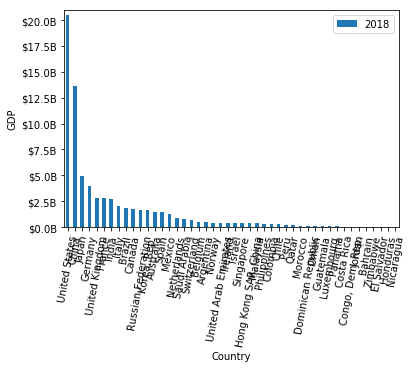

In [25]:
# Create a very basic Bar Plot of GDP per country
# Format the axis to be in "billions"

ax = df18gdp.plot(kind='bar', rot = 80)

# Set y scale
ax.set_ylim((0, 21000000000000))

# Set x-axis label
ax.set_xlabel('Country')
ax.set_xticks
# Set y-axis label
ax.set_ylabel("GDP")
ax.set_yticks


def billions(x,pos):
    return '$%1.1fB' % (x * 1e-12)


formatter = FuncFormatter(billions)
ax.yaxis.set_major_formatter(formatter)

> The above result is very cramped and not very visually appealing, so below I will improve it.

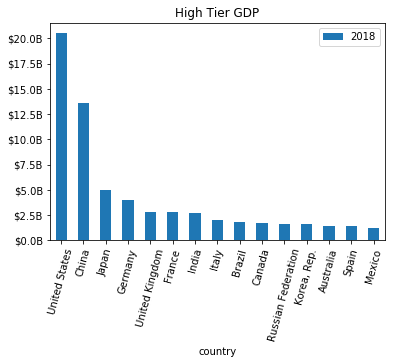

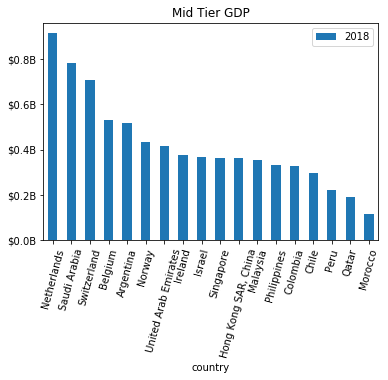

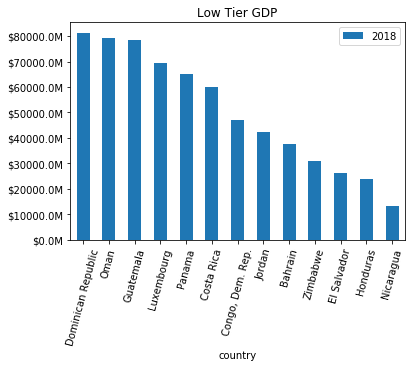

In [26]:
# This time, create different Tiers of GDP Bar Graphs
# Rather than use a threshold, here we will simply use the indexed countries
# Because they were already sorted from high to low, this will achieve the same result
# We also add the millions format, for the low tier group

def billions(x,pos):
    return '$%1.1fB' % (x * 1e-12)

Bformatter = FuncFormatter(billions)

def millions(x,pos):
    return '$%1.1fM' % (x * 1e-6)

Mformatter = FuncFormatter(millions)


TopGdp = df18gdp['United States' : 'Mexico']
top_gdp_plot = TopGdp.plot(kind= 'bar', rot = 75)
top_gdp_plot.yaxis.set_major_formatter(Bformatter)
top_gdp_plot.set_title('High Tier GDP')
top_gdp_plot


MidGdp = df18gdp['Netherlands' : 'Morocco']
mid_gdp_plot = MidGdp.plot(kind= 'bar', rot = 75)
mid_gdp_plot.yaxis.set_major_formatter(Bformatter)
mid_gdp_plot.set_title('Mid Tier GDP')
mid_gdp_plot


LowGdp = df18gdp['Dominican Republic' : ]
low_gdp_plot = LowGdp.plot(kind= 'bar', rot = 75)
low_gdp_plot.yaxis.set_major_formatter(Mformatter)
low_gdp_plot.set_title('Low Tier GDP')
low_gdp_plot